## Simple Linear Regression

### Importing Needed Packages

In [9]:
!pip install pandas matplotlib numpy scikit-learn
import pandas as pd                # powerful library for data manipulation and analysis
import matplotlib.pyplot as plt    # a plotting library for creating visualizations in Python, graphs, chats and plots.
import numpy as np                 # a package for numerical computing in Python, essential for scientific computing.
from sklearn.model_selection import train_test_split   # machine learning library that provides simple and efficient tools for data mining and analysis.


%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


#### Downloading Data

In [10]:
#To download the data, we will use !wget to download if from IBM Object Storage
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [16]:
import requests

def download(url, filename):
    response = requests.get(url)  # Sends an HTTP request to the given URL
    if response.status_code == 200:  # Checks if the request was successful
        with open(filename, "wb") as f:  # Opens a file in binary write mode
            f.write(response.content)  # Writes the response data to the file


#### Understanding the data 

FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

#### Reading the data in

In [17]:

# Define the path (URL) first
path = "https://example.com/FuelConsumption.csv"

# Download the file
download(path, "FuelConsumption.csv")

In [18]:
df = pd.read_csv("FuelConsumption.csv")     # This reads the CSV FuelConsumption.csv and stores it in a variable df(dataframe)_

# take a look at the dataset
df.head()                                    #5 rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Data Exploration

In [19]:
#summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [20]:
# we will select some features to explore more
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


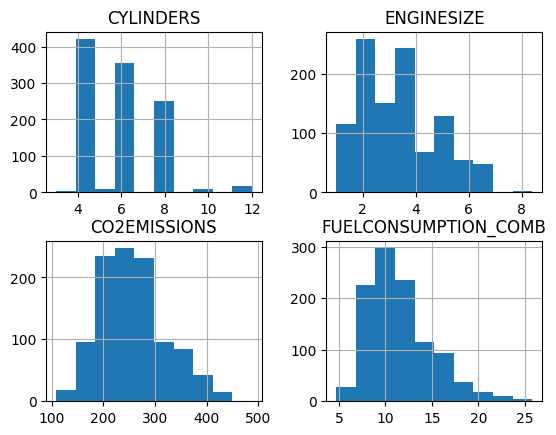

In [22]:
#Lets Plot each of these features
viz = cdf [['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]   # this code creates a histogram for 4 selected columns in the dataset
viz.hist()
plt.show()

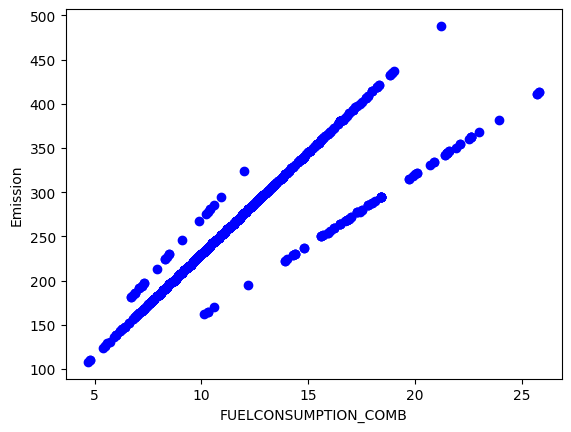

In [23]:
#Now,lets plot each of these features against the Emission, to see how linear their relationship is :
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue') # creates a scatter plot to visualize the relationship between fuel consump and CO2 emmisions:
plt.xlabel("FUELCONSUMPTION_COMB")       #Labels the x-axis as Fuel Consumption and the y-axis as Emission
plt.ylabel("Emission")
plt.show()                               # Displays the scatter plot

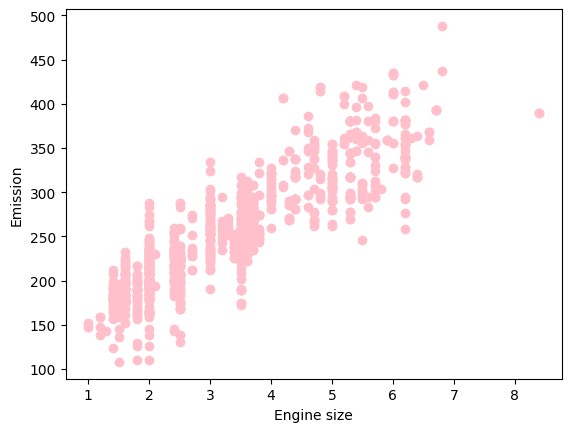

In [26]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='pink')   # This code creates a scatter plot to visualize the relationship between engine size and CO2
plt.xlabel("Engine size")           # Label the X-axis as Engine Size and y-axis as Emission
plt.ylabel("Emission")
plt.show()

### My Practice

#### Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


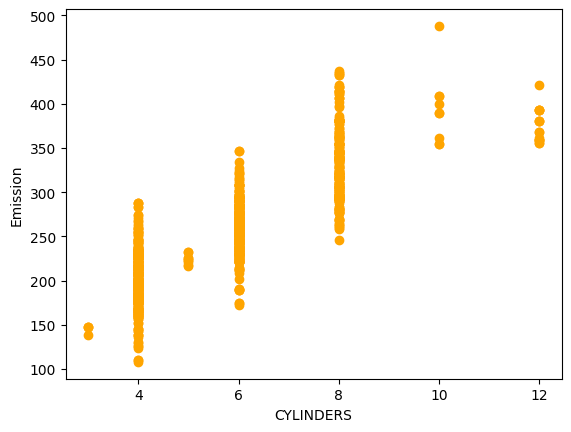

In [32]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'orange')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

#### train and test dataset

Train/test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which you train with your training set and test with
your testing set. This will provide a more accurate evaluation on out-of-sample accuracy bc the testing dataset is not part of training model. 
Therefore, it gives us a better understanding of how well our model generalizes on new data. 


Lets's split our dataset info train and test set . 80% will be used for training, 20% for testing